In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Dataset load
df=pd.read_csv("Dataset .csv")

#Explore the dataset
#identify the number of rows and columns.
print("Number of rows and columns in the dataset:",df.shape)
print ("\n",df.info())

Number of rows and columns in the dataset: (9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now 

In [20]:
#Check for missing values
print("\nMissing values in the dataset:",df.isnull().sum())


Missing values in the dataset: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [21]:
#handle missing values

df['Cuisines'].fillna("Unknown", inplace=True)

print("\nMissing values in the dataset:",df.isnull().sum())



Missing values in the dataset: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


C:\Users\Avaneesh Malviya\AppData\Local\Temp\ipykernel_11548\3343678813.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna("Unknown", inplace=True)


In [22]:
#data type conversion if necessary

print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [24]:
#converion 1 for yes and 0 for no for 
# Columns: Has Table booking, Has Online delivery, Is delivering now, Switch to order menu
# machine learning model can work easily

# Convert Boolean Columns
bool_column = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in bool_column:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).astype('Int64')

# Convert Category Columns
# memory optimization
category_column = ['City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text','Country Code']
for col in category_column:
    df[col] = df[col].astype('category')

print("\n Data Type Conversion Completed")
print(df.dtypes) 



 Data Type Conversion Completed
Restaurant ID              int64
Restaurant Name           object
Country Code            category
City                    category
Address                   object
Locality                category
Locality Verbose        category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking          Int64
Has Online delivery        Int64
Is delivering now          Int64
Switch to order menu       Int64
Price range                int64
Aggregate rating         float64
Rating color            category
Rating text             category
Votes                      int64
dtype: object


In [25]:
# Analyze the distribution of the target variable ("Aggregate rating")


#rating value count 
print(df["Aggregate rating"].value_counts().sort_index())


Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


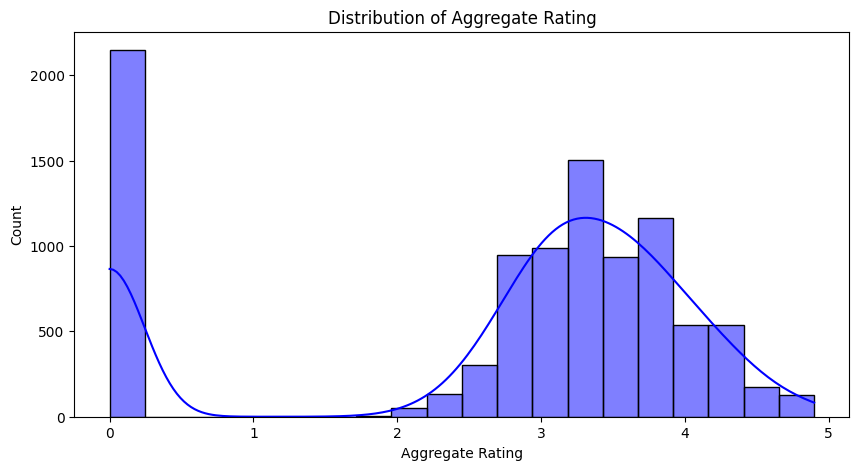

In [26]:
#Histogram + Kernel Density Estimate shows rating  overall spread

plt.figure(figsize=(10,5))
sns.histplot(df["Aggregate rating"], bins=20, kde=True, color="blue")  
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Distribution of Aggregate Rating")
plt.show()

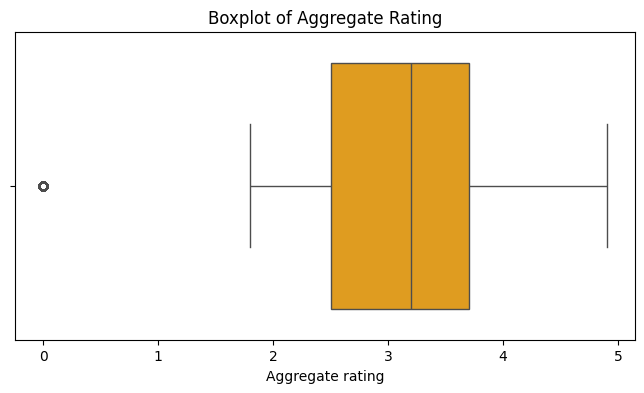

In [27]:
#boxplot gives idea of outliners and rating spread 

plt.figure(figsize=(8,4))
sns.boxplot(x=df["Aggregate rating"], color="orange")
plt.title("Boxplot of Aggregate Rating")
plt.show()


In [28]:
#percentage Distribution of Rating 

rating_count = df["Aggregate rating"].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Ratings:\n", rating_count)



Percentage Distribution of Ratings:
 Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9     0.020940
1.8     0.010470
Name: proportion, dtype: float64


In [29]:
# check for class imbalance in the target variable 
#22.48% is high but not a  critical imbalance .

threshold = 50


max_class = rating_counts.idxmax()   # return most frequent rating , idxmax() tell the index of most frequent rating
max_percent = rating_counts.max() # return the percentage of most frequent rating

if max_percent > threshold:
    print(f"\n Class Imbalance Detected! Rating {max_class} holds {max_percentage:.2f}% of the data.")
else:
    print("\n No major class imbalance detected.")


 No major class imbalance detected.
